# 09 Factors

- The factor() Function
- The split() Function
- The tapply() Function
- The qplot() Function
- The gl() Function

Factors represent categorical data that can take on a limited number of unique non-continuous integer values  
Factors are stored as a vector of integer values with associated character labels  
Factors such as male and female are  better than using integers like 1 and 2 (self-describing)  
Factors can be ordered (small, medium, large) or unordered (Sales, HR, Finance, Legal)  
Factors are used in statistical modeling functions such as lm() and glm()  
Factors are used in summary statistics, plots, and regressions  
Factors oftene created automatically reading dataset using functions like read.table()  

## The factor() Function

The factor function is used to encode a vector of strings or numbers as a factor.

In [64]:
f <- factor(c(34.4, 11.2, 58.4, 62.9, 58.4))
f             # the 5 factor values
levels(f)[f]  # the 5 factor values as levels
as.numeric(f) # integer encodings of the 5 factor values
levels(f)     # values of the 4 available factors

[1] 34.4 11.2 58.4 62.9 58.4
Levels: 11.2 34.4 58.4 62.9

[1] "34.4" "11.2" "58.4" "62.9" "58.4"

[1] 2 1 3 4 3

[1] "11.2" "34.4" "58.4" "62.9"

In [4]:
v <- c(1, 2, 4, 8, 16) # numeric
f <- factor(v)
f
is.factor(f)
is.ordered(f)
#f[1] > f[2]    # not meaningful for unordered factors

v <- c("Male", "Female") # character
f <- factor(v)
f
is.factor(f)
is.ordered(f)
#f[1] > f[2]    # not meaningful for unordered factors

[1] 1  2  4  8  16
Levels: 1 2 4 8 16

[1] TRUE

[1] FALSE

[1] Male   Female
Levels: Female Male

[1] TRUE

[1] FALSE

In [33]:
# unordered factors default to alphabetic order: Finance HR Legal Sales
x <- factor(c("Sales", "Finance", "HR", "HR", "Legal", "HR", "Sales"))
x
is.factor(x)
is.ordered(x)
table(x)
unclass(x)
levels(x)
nlevels(x)

[1] Sales   Finance HR      HR      Legal   HR      Sales  
Levels: Finance HR Legal Sales

[1] TRUE

[1] FALSE

x
Finance      HR   Legal   Sales 
      1       3       1       2 

[1] 4 1 2 2 3 2 4
attr(,"levels")
[1] "Finance" "HR"      "Legal"   "Sales"

[1] "Finance" "HR"      "Legal"   "Sales"

[1] 4

In [5]:
# ordered factors are explicitly ordered: small medium  large
f <- factor(c("medium", "small", "medium", "large", "large", "small", "large"),
  levels = c("small", "medium", "large"), ordered=TRUE)
f
is.factor(f)
is.ordered(f)
table(f)
unclass(f)
levels(f)
nlevels(f)
f[1] > f[2]    # is meaningful for ordered factors: TRUE

[1] medium small  medium large  large  small  large 
Levels: small < medium < large

[1] TRUE

[1] TRUE

f
 small medium  large 
     2      2      3 

[1] 2 1 2 3 3 1 3
attr(,"levels")
[1] "small"  "medium" "large"

[1] "small"  "medium" "large"

[1] 3

[1] TRUE

In [14]:
v <- c("M", "F", "F", "M", "M")
f <- factor(v)                   # initial set of levels: 'F' 'M'
levels(f)
levels(f) <- c("Female", "Male") # assign new set of levels: 'Female' 'Male'
levels(f)

[1] "F" "M"

[1] "Female" "Male"

## The split() Function

The split() function splits a vector into groups by factor.

small medium  large 
     2      2      3

sizes,prices
2,5
1,7
2,3
3,9
3,6
1,4
3,5


     sizes           prices     
 Min.   :1.000   Min.   :3.000  
 1st Qu.:1.500   1st Qu.:4.500  
 Median :2.000   Median :5.000  
 Mean   :2.143   Mean   :5.571  
 3rd Qu.:3.000   3rd Qu.:6.500  
 Max.   :3.000   Max.   :9.000  

$small
[1] 1 1 7 4

$medium
[1] 2 2 5 3

$large
[1] 3 3 3 9 6 5

sizes,prices
medium,5
small,7
medium,3
large,9
large,6
small,4
large,5


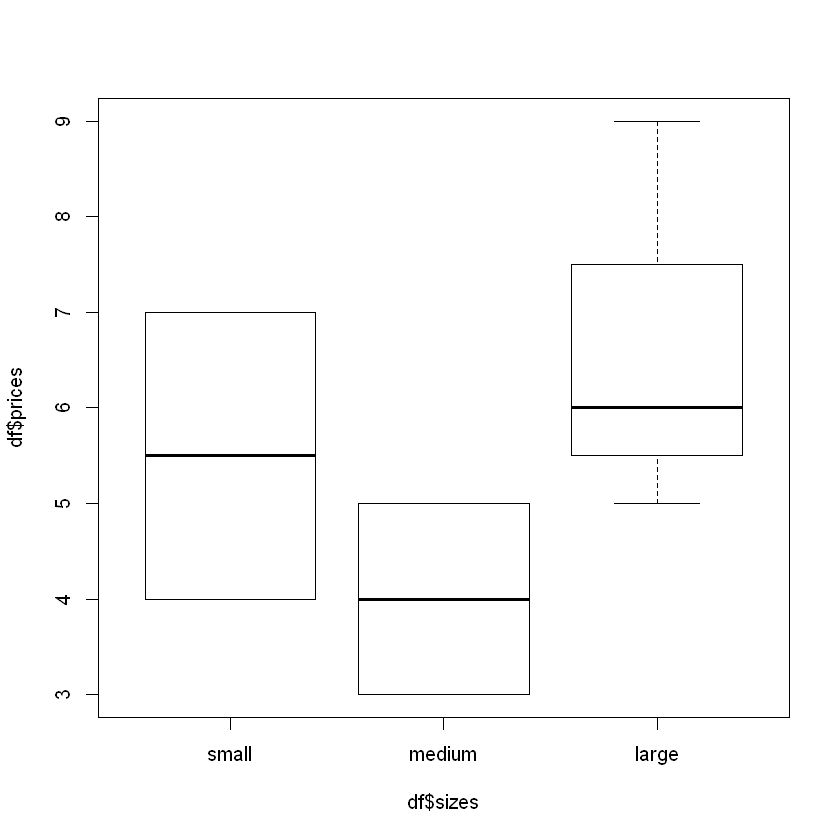

In [21]:
# the split() function splits the collection into groups by factor
# the labels argument is a vector of values of labels for categories in the levels argument
sizes <- factor(c("medium", "small", "medium", "large", "large", "small", "large"), 
  levels = c("small", "medium", "large"), labels = c("small", "medium", "large"), ordered=TRUE)
summary(sizes)
prices <- c(5.00,  7.00, 3.00, 9.00, 6.00, 4.00, 5.00)
m <- cbind(sizes, prices)
m
summary(m)
groups <- split(m, sizes)
groups
df = data.frame(sizes, prices)
df
plot(df$prices ~ df$sizes)

## The tapply() Function

The split() function splits a vector into groups and then applies a speciﬁed function on each group.

In [10]:
# the tapply() function
heights <- c(67, 77, 87, 70, 78, 92)
genders <- factor(c("F","M","M","F","M","M"))
heights.by.gender <- tapply(heights, genders, mean) # split heights by gender factor and calculate mean
heights.by.gender

F    M 
68.5 83.5

## The qplot() Function

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


mpg       cyl      disp        hp      drat        wt      qsec        vs 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
       am      gear      carb 
"numeric" "numeric" "numeric"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6cyl,160.0,110,3.90,2.620,16.46,0,Manual,4gears,4
Mazda RX4 Wag,21.0,6cyl,160.0,110,3.90,2.875,17.02,0,Manual,4gears,4
Datsun 710,22.8,4cyl,108.0,93,3.85,2.320,18.61,1,Manual,4gears,1
Hornet 4 Drive,21.4,6cyl,258.0,110,3.08,3.215,19.44,1,Automatic,3gears,1
Hornet Sportabout,18.7,8cyl,360.0,175,3.15,3.440,17.02,0,Automatic,3gears,2
Valiant,18.1,6cyl,225.0,105,2.76,3.460,20.22,1,Automatic,3gears,1
Duster 360,14.3,8cyl,360.0,245,3.21,3.570,15.84,0,Automatic,3gears,4
Merc 240D,24.4,4cyl,146.7,62,3.69,3.190,20.00,1,Automatic,4gears,2
Merc 230,22.8,4cyl,140.8,95,3.92,3.150,22.90,1,Automatic,4gears,2
Merc 280,19.2,6cyl,167.6,123,3.92,3.440,18.30,1,Automatic,4gears,4


mpg       cyl      disp        hp      drat        wt      qsec        vs 
"numeric"  "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
       am      gear      carb 
 "factor"  "factor" "numeric"

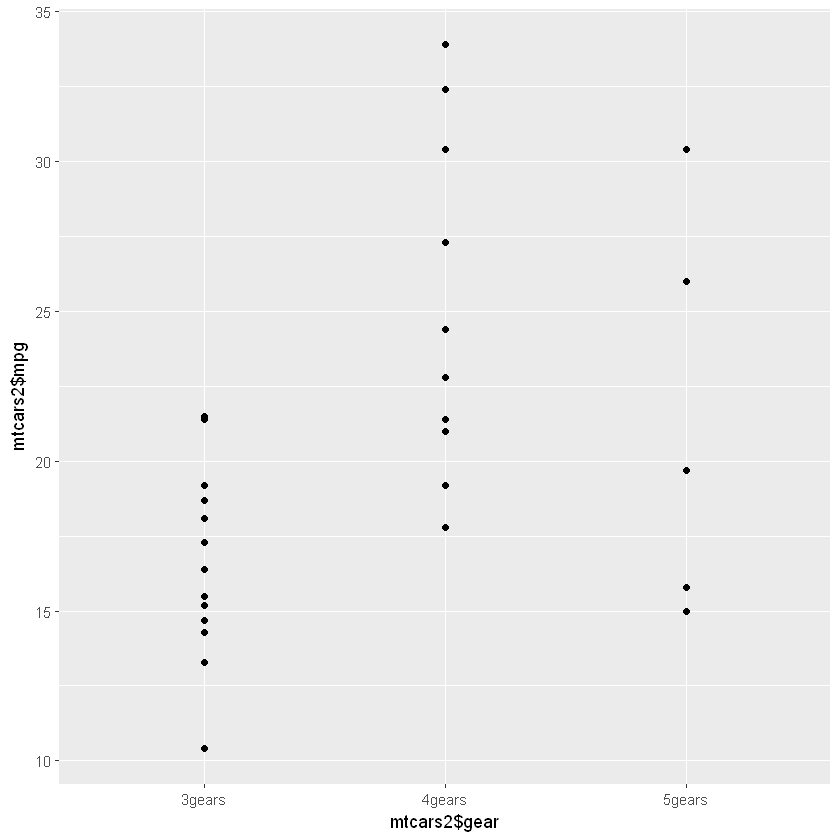

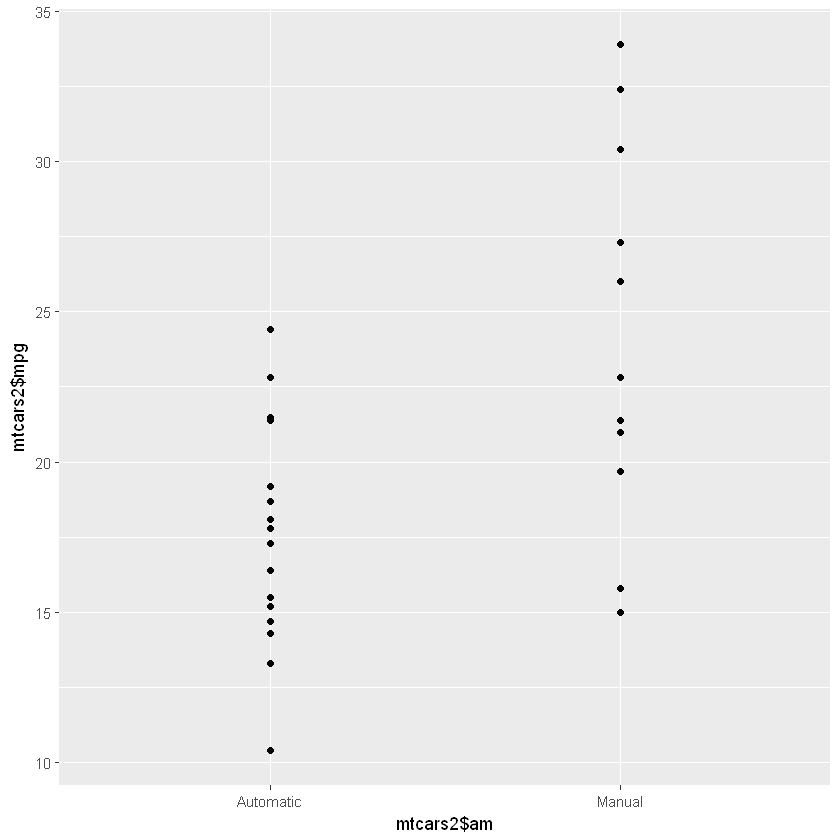

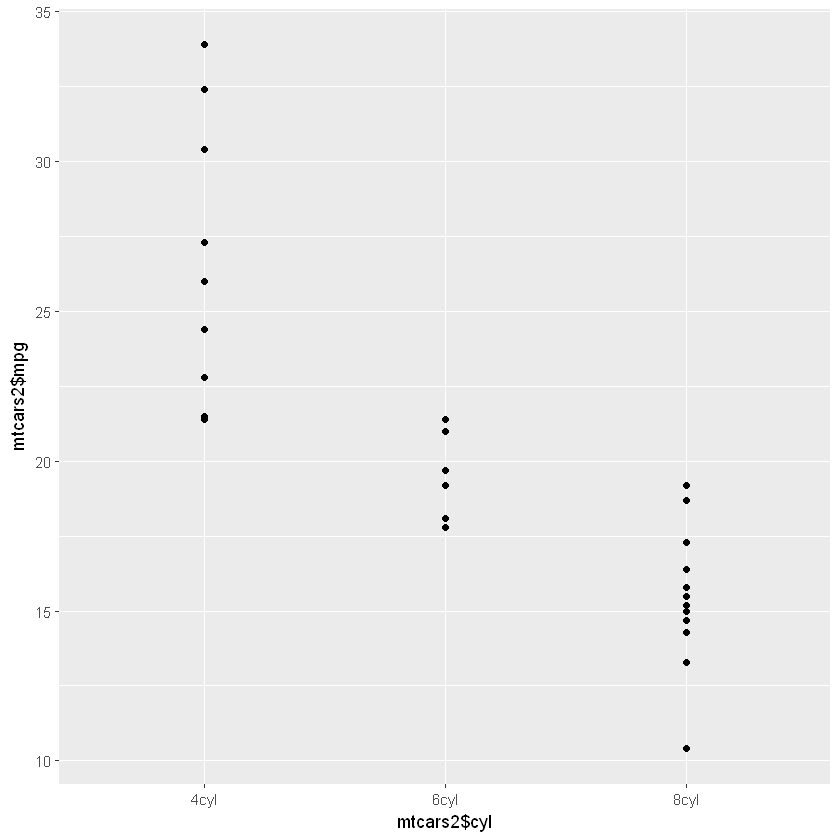

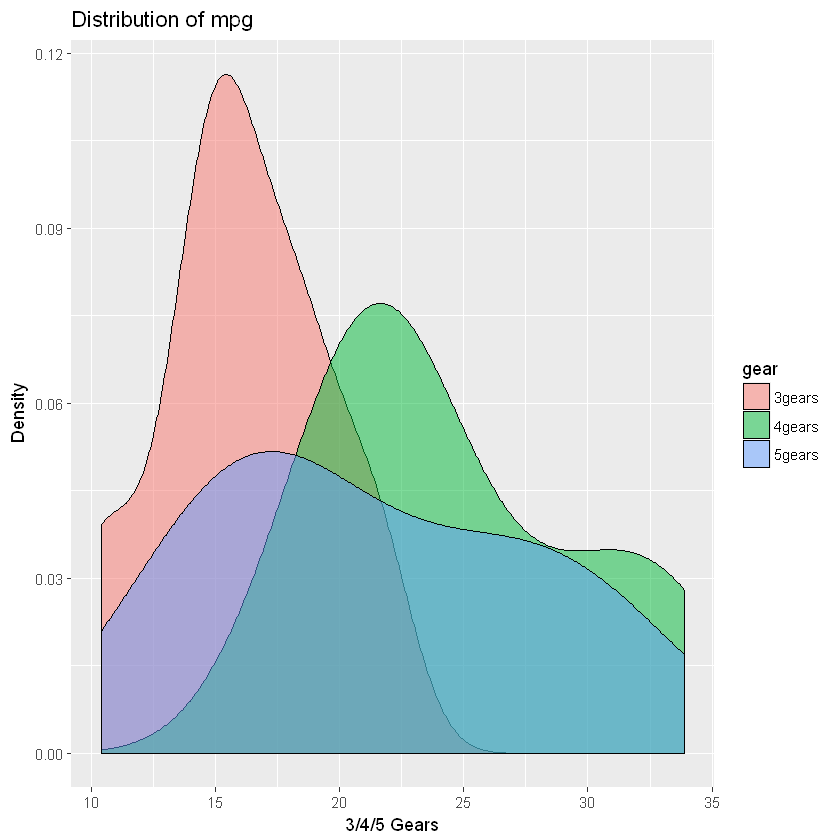

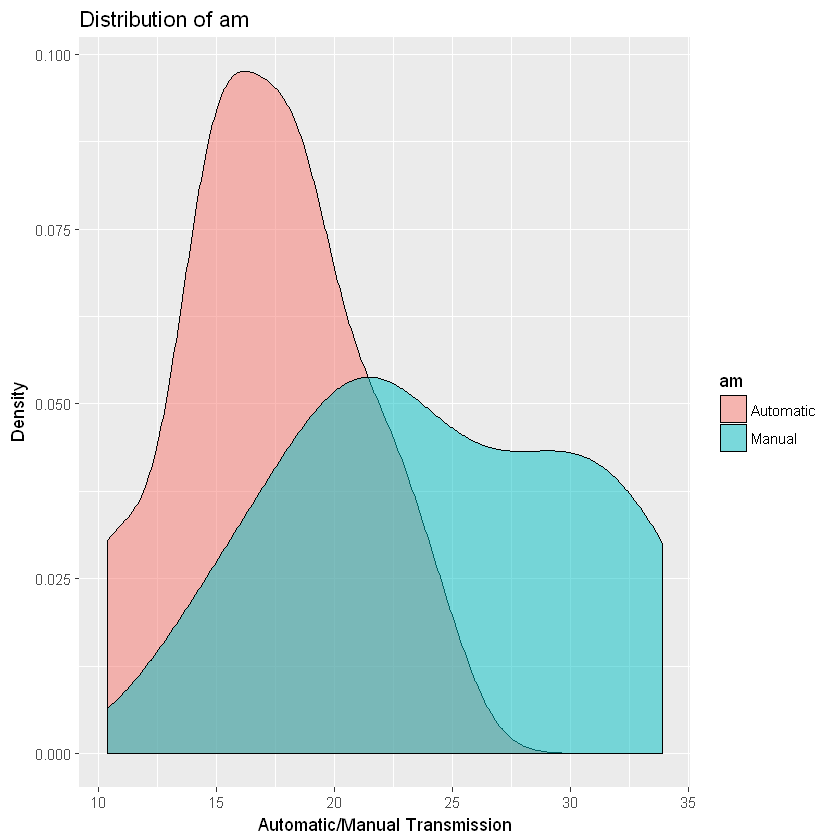

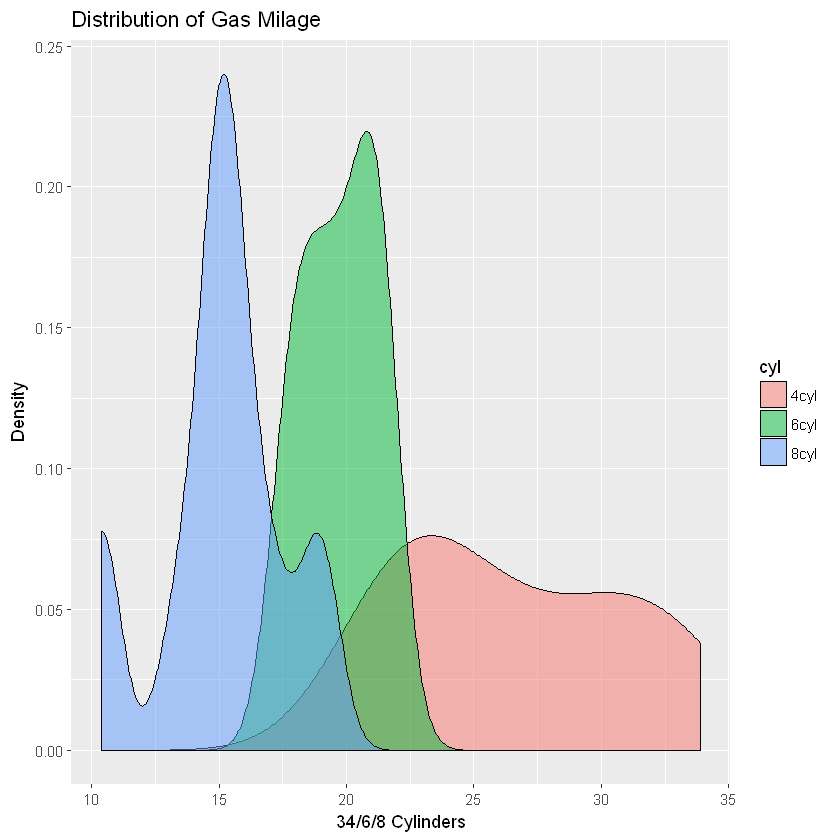

In [19]:
library("ggplot2")

data(mtcars)
mtcars

sapply(mtcars, FUN=class)

# create factors with value labels
mtcars2 <- mtcars
mtcars2$gear <- factor(mtcars$gear,levels=c(3,4,5), labels=c("3gears","4gears","5gears")) 
mtcars2$am <- factor(mtcars$am,levels=c(0,1), labels=c("Automatic","Manual")) 
mtcars2$cyl <- factor(mtcars$cyl,levels=c(4,6,8), labels=c("4cyl","6cyl","8cyl")) 

mtcars2

sapply(mtcars2, FUN=class)

qplot(mtcars2$gear, mtcars2$mpg)
qplot(mtcars2$am, mtcars2$mpg)
qplot(mtcars2$cyl, mtcars2$mpg)

# mpg grouped by number of gears factor ("3gears","4gears","5gears")
qplot(mpg, data=mtcars2, geom="density", fill=gear, alpha=I(.5), 
   main="Distribution of mpg", xlab="3/4/5 Gears", 
   ylab="Density")

# mpg grouped by am factor (Automatic/Manual)
qplot(mpg, data=mtcars2, geom="density", fill=am, alpha=I(.5), 
   main="Distribution of am", xlab="Automatic/Manual Transmission", 
   ylab="Density")

# mpg grouped by number of gears factor (3gears/4gears/5gears)
qplot(mpg, data=mtcars2, geom="density", fill=cyl, alpha=I(.5), 
   main="Distribution of Gas Milage", xlab="34/6/8 Cylinders", 
   ylab="Density")

## The gl() Function

In [20]:
# the gl() function
f <- gl(4, 10) 
f

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
[39] 4 4
Levels: 1 2 3 4